In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl

In [79]:
#read the train data
df = pd.read_csv('./data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [81]:
#remove the rows with missing values since they are few
trainClean = df.dropna()
trainClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

# EDA trying to see different patterns in the data

1. Heatmap of the correlation matrix
- one of the first things we see is that the correlation between the features is very low, which is good for the model, because it means that the features are independent of each other.
- secondly, we see that the correlation between the features and the price_range is also very low, which is not good for the model, because it means that the features are not very informative about the target. execpt for the ram feature which has a correlation of 0.92.
from this we can conclude that the ram feature is the most important feature in the dataset.

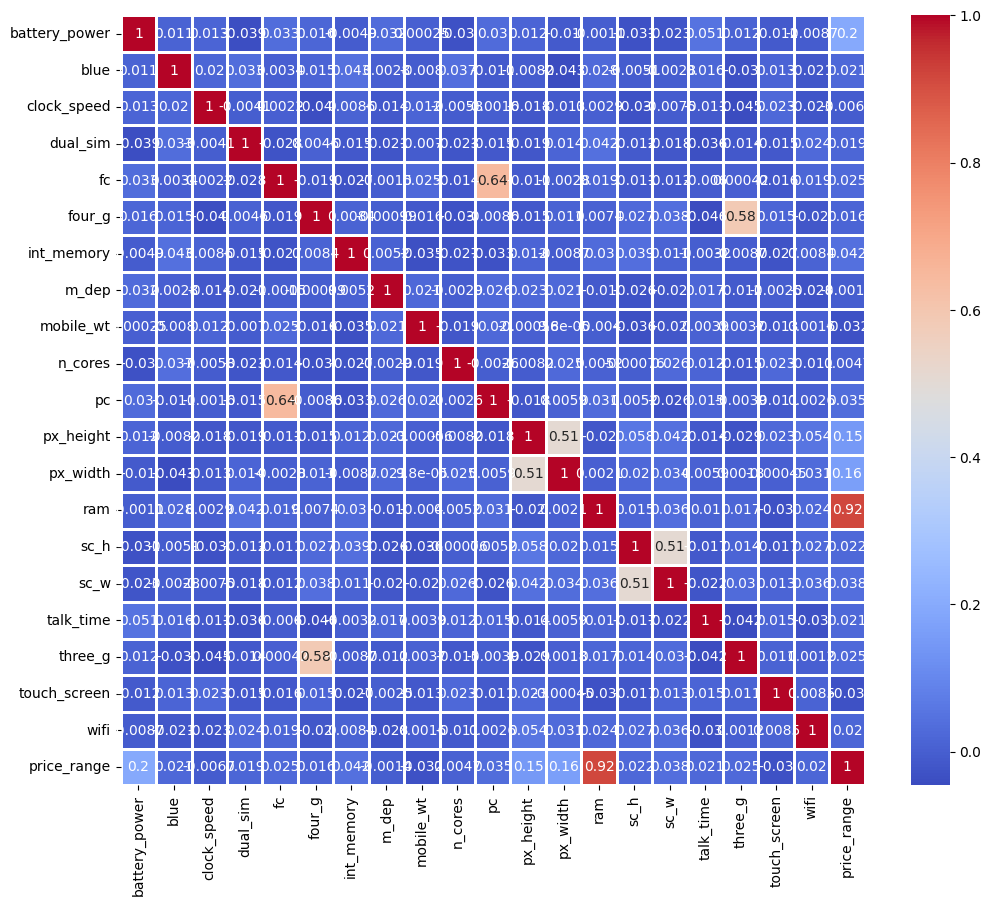

In [82]:
plt.figure(figsize=(12, 10))
sns.heatmap(trainClean.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()

2)  Boxplots
- as we can see fc , three_g , px_height, has some outliers, but it is ok since these features are not strongly correlated with the price_range
execpt for px_height not so many phones with high px_height are there in the market because they are premium phones.

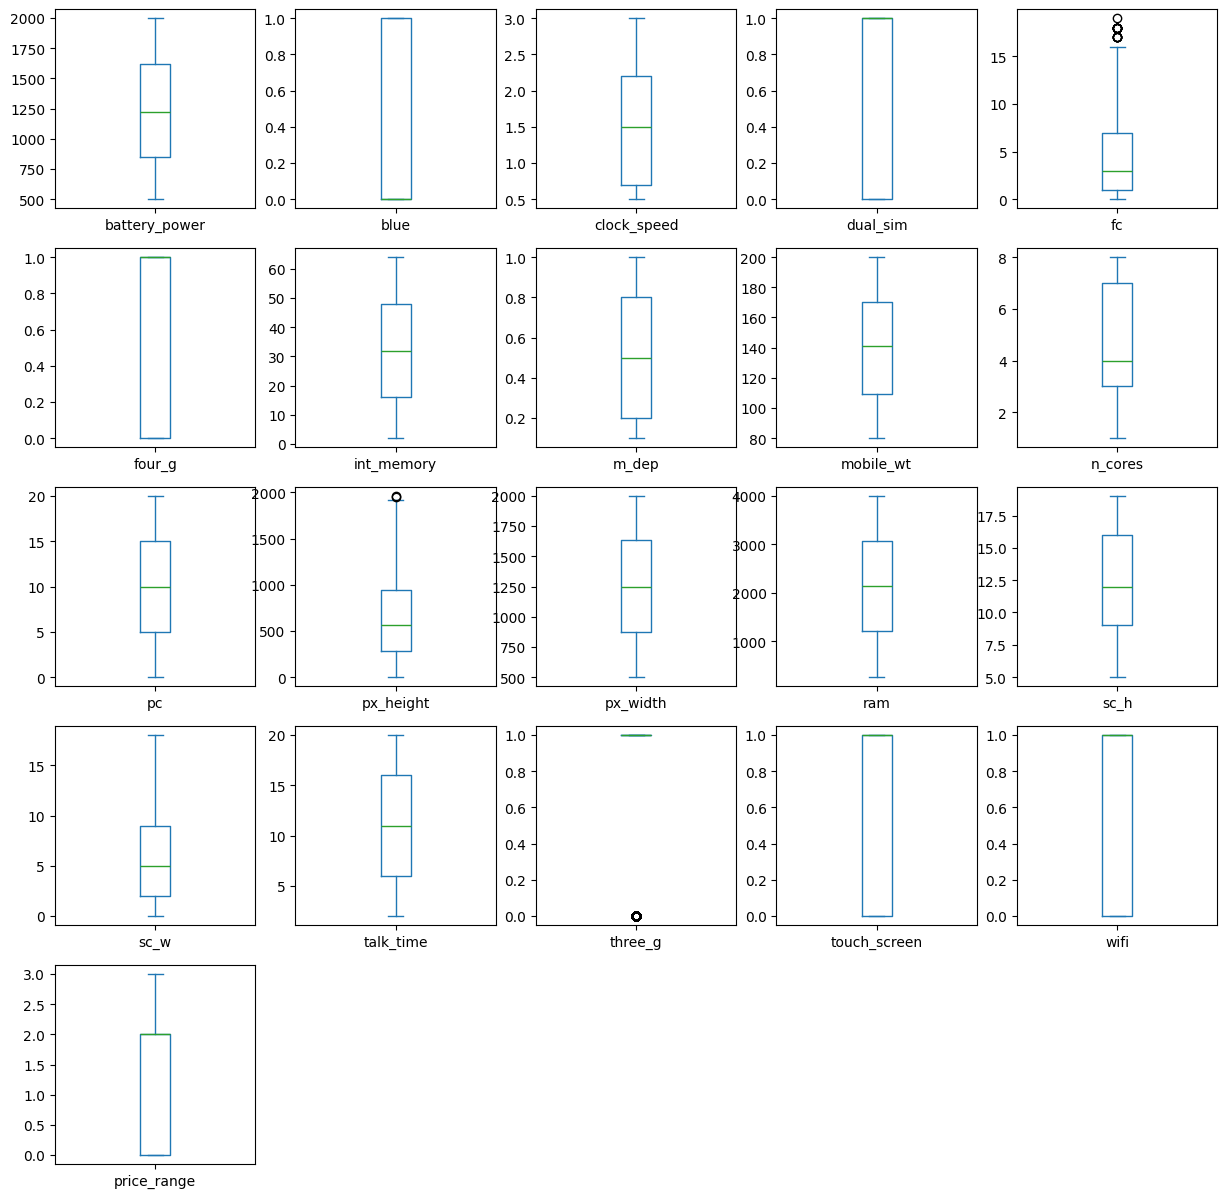

In [83]:
trainClean.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize=(15, 15))
plt.show()

# ram vs price_range
- we can see that the price range increases with the increase in the ram, which is expected because the ram is the most important feature in the dataset. but if we were to take the ram as the only feature to predict the price range, our model might overfit the data and would be easily affected by the noise in the ram feature.
- to avoid this we need to add 3 more features to the model to make it more robust. which have the highest correlation with the price_range.
- another reason it will always predict the overlapping data points incorrectly.

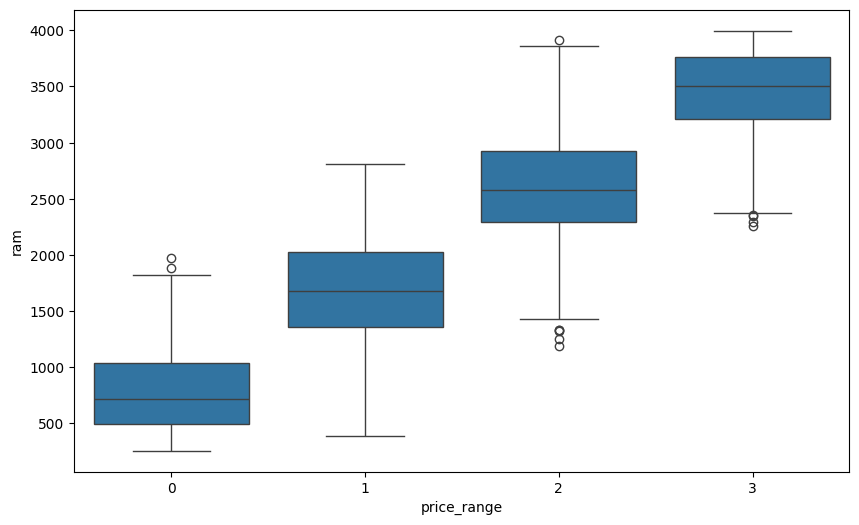

In [84]:
# plot ram vs price_range
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=trainClean)
plt.show()

3) Histograms
- the histograms show that the data is normally distributed, which is good for the model, because it means that the model will be able to learn the patterns in the data.
- as properly evident in the price_range histogram, the data is balanced, which is good for the model as it will not be biased towards one class.

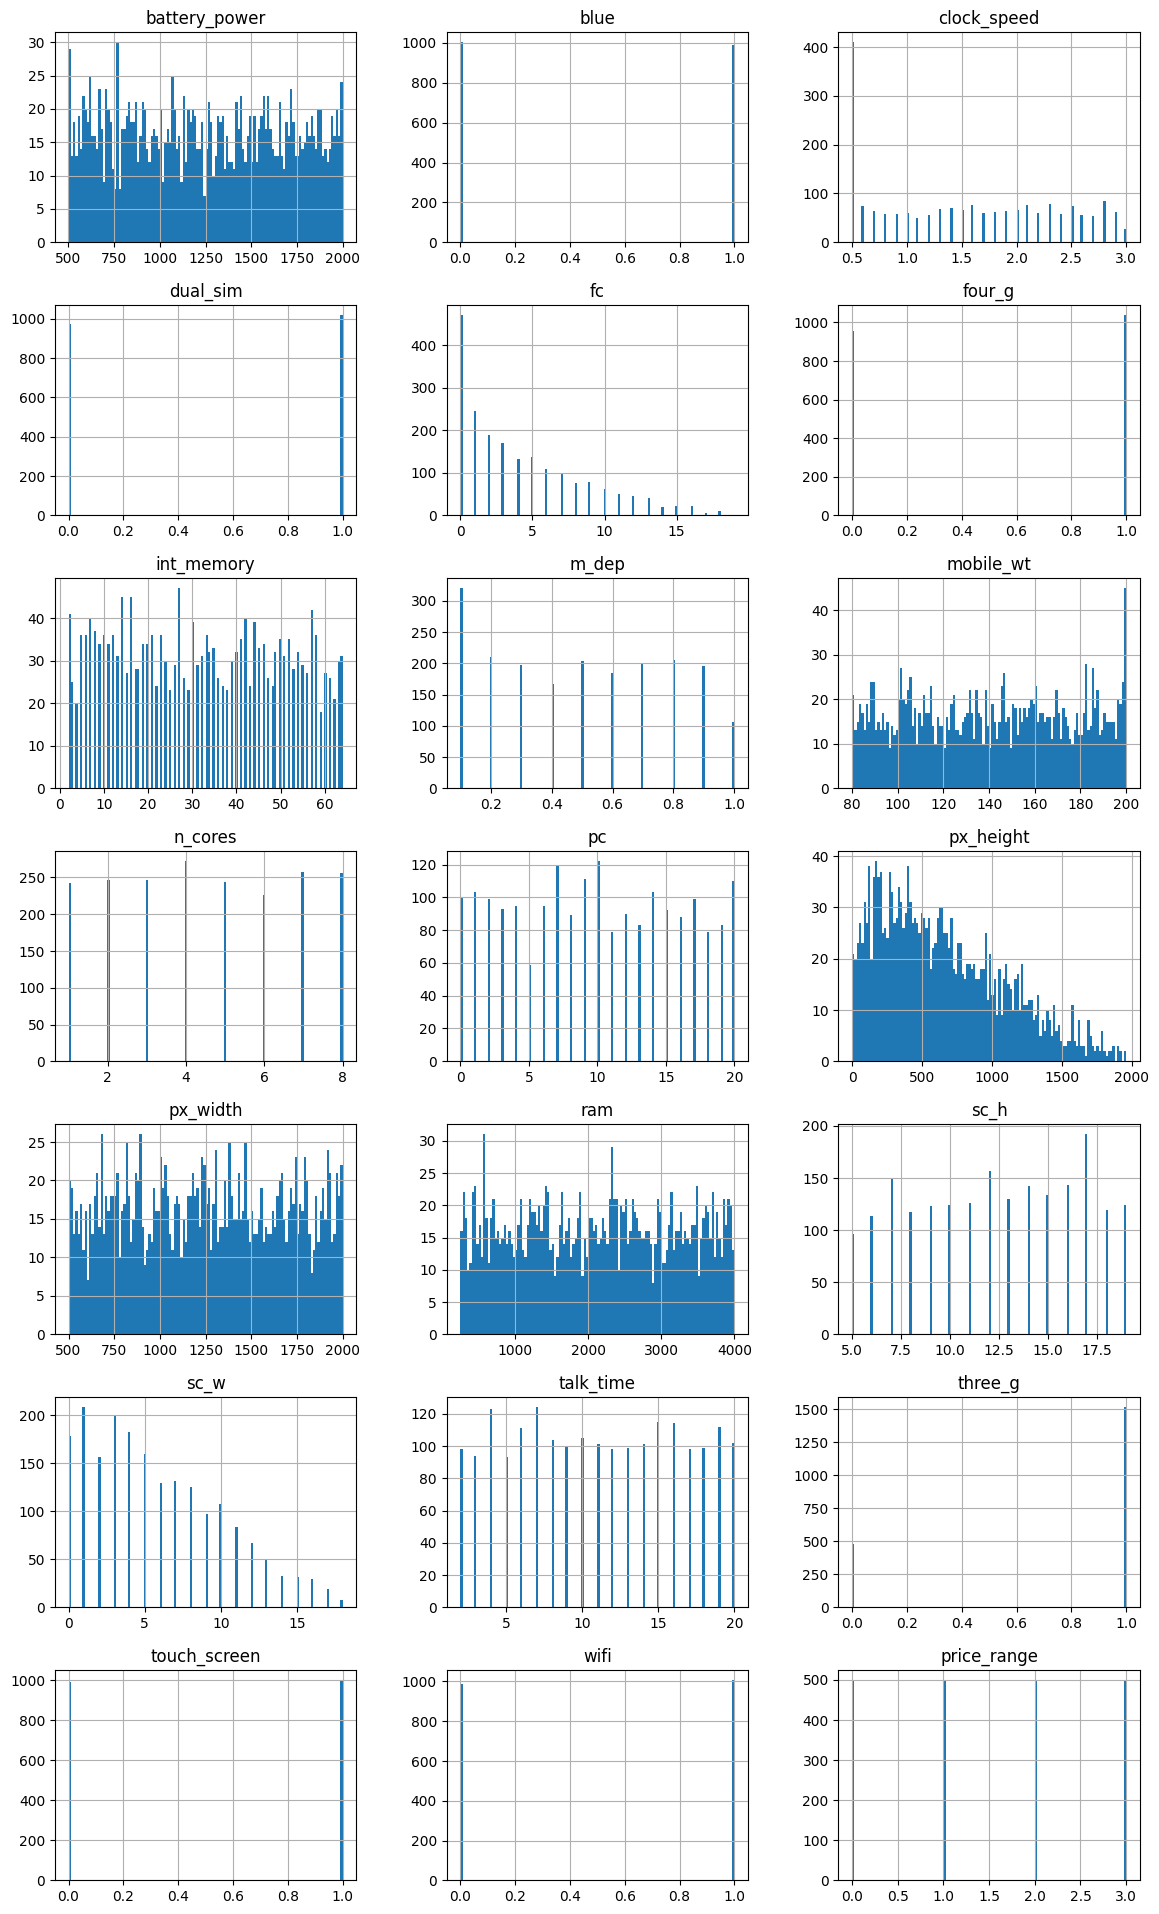

In [85]:
#draw histograms of the variables on the same plot
trainClean.hist(bins=120, figsize=(14, 24), layout = (7, 3))
plt.show()

In [86]:

#get corelation of all features with price_range
correlation = np.abs(trainClean.corr()['price_range']).sort_values(ascending=False) #absolute value to get the magnitude of the correlation
correlated_features = correlation[0:5].index
correlated_features

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height'], dtype='object')

In [87]:
scaler = MinMaxScaler()

trainClean.loc[:, trainClean.columns != 'price_range'] = scaler.fit_transform(trainClean.loc[:, trainClean.columns != 'price_range'])
trainClean.head()

pkl.dump(scaler, open('./data/scaler.pkl', 'wb')) #to be used in the prediction script to normalise test data.


In [88]:
X = trainClean[correlated_features]

In [89]:
#save both trainClean for backup and X for training
trainClean.to_csv('./data/train_clean.csv', index=False)
X.to_csv('./data/selected_features.csv', index=False)